In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


0.8797315436241611

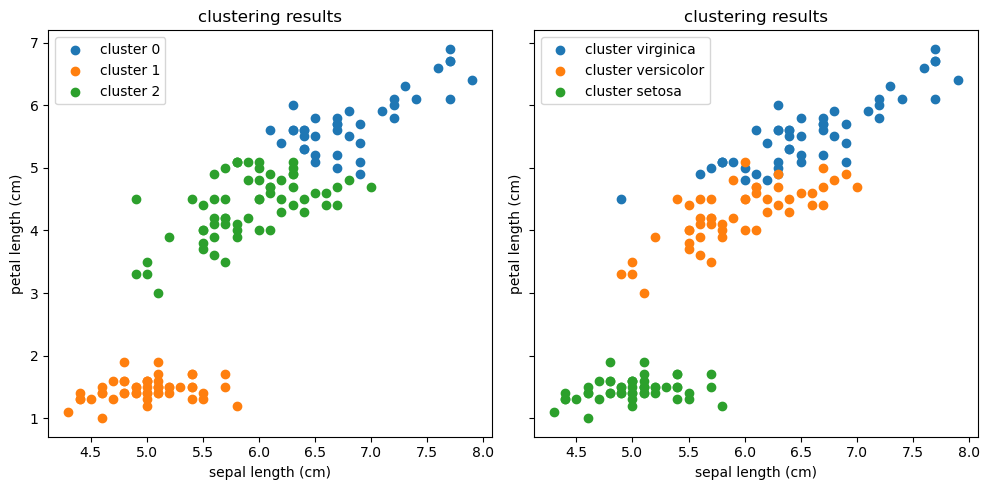

In [3]:
import seaborn as sns
#print(iris_df.shape)
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

fig, ax = plt.subplots(1,2, figsize=(10, 5), sharex="all", sharey = "all", tight_layout=True)

iris_df = sns.load_dataset("iris")
display(iris_df.head())
df = iris_df.drop(["species"],axis=1)

km = KMeans(n_clusters=3)             #クラスター数, 繰り返し回数の最大値
clusters_sklearn = km.fit_predict(df) #各データ点がどのクラスター所属するか予測 (クラスター中心が最も近いクラスターを選択)

print(clusters_sklearn)
colors=["red","green","blue"]

for i in set(clusters_sklearn):
    idx = clusters_sklearn==i
    ax[0].scatter(df.loc[idx,'sepal_length'],df.loc[idx,'petal_length'],label="cluster "+str(i))
    ax[0].legend()
  
for j in set(iris_df["species"]) :
    idx = iris_df['species']==str(j)
    ax[1].scatter(iris_df.loc[idx,'sepal_length'],iris_df.loc[idx,'petal_length'],label="cluster "+str(j))
    ax[1].legend()
   
for k in range(len(ax)):
    ax[k].set_xlabel('sepal length (cm)')
    ax[k].set_ylabel('petal length (cm)')
    ax[k].set_title("clustering results")    
fig.show()

from sklearn.metrics.cluster import rand_score
rand_score(clusters_sklearn,iris_df['species']) #２つのクラスタ間の類似性の尺度



In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
iris.data.shape

(150, 4)

In [6]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [7]:
import seaborn as sns

iris_df = sns.load_dataset("iris")
display(iris_df.head())
print(iris_df.shape)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


(150, 5)


For n_clusters = 2 The average silhouette_score is : 0.6810461692117467
For n_clusters = 3 The average silhouette_score is : 0.5528190123564101
For n_clusters = 4 The average silhouette_score is : 0.49805050499728803
For n_clusters = 5 The average silhouette_score is : 0.4887488870931063


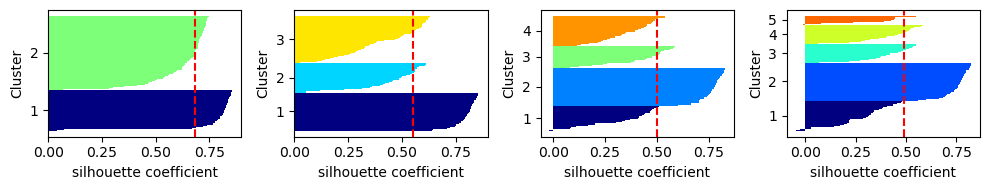

In [8]:
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib import cm

K=6
fig, ax = plt.subplots(1,K-2, figsize=(10,2), tight_layout=True)
for n_clusters in range(2,K):
    km = KMeans(n_clusters=n_clusters)             #クラスター数, 繰り返し回数の最大値
    clusters_sklearn = km.fit_predict(df) #各データ点がどのクラスター所属するか予測 (クラスター中心が最も近いクラスターを選択)    

    silhouette_avg = silhouette_score(df, clusters_sklearn)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    cluster_labels = np.unique(clusters_sklearn)       # y_kmの要素の中で重複を無くす
    n_clusters=cluster_labels.shape[0]     # 配列の長さを返す。つまりここでは n_clustersで指定した3となる

    # シルエット係数を計算
    silhouette_vals = silhouette_samples(df,clusters_sklearn,metric='euclidean')  # サンプルデータ, クラスター番号、ユークリッド距離でシルエット係数計算
    y_ax_lower, y_ax_upper= 0,0
    yticks = []

    for i,c in enumerate(cluster_labels):
            c_silhouette_vals = silhouette_vals[clusters_sklearn==c]      # cluster_labelsには 0,1,2が入っている（enumerateなのでiにも0,1,2が入ってる（たまたま））
            c_silhouette_vals.sort()
            y_ax_upper += len(c_silhouette_vals)              # サンプルの個数をクラスターごとに足し上げてy軸の最大値を決定
            color = cm.jet(float(i)/n_clusters)               # 色の値を作る
            ax[n_clusters-2].barh(range(y_ax_lower,y_ax_upper),            # 水平の棒グラフのを描画（底辺の範囲を指定）
                             c_silhouette_vals,               # 棒の幅（1サンプルを表す）
                             height=1.0,                      # 棒の高さ
                             edgecolor='none',                # 棒の端の色
                             color=color)                     # 棒の色
            yticks.append((y_ax_lower+y_ax_upper)/2)          # クラスタラベルの表示位置を追加
            y_ax_lower += len(c_silhouette_vals)              # 底辺の値に棒の幅を追加

    silhouette_avg = np.mean(silhouette_vals)                 # シルエット係数の平均値
    ax[n_clusters-2].axvline(silhouette_avg,color="red",linestyle="--")    # 係数の平均値に破線を引く 
    ax[n_clusters-2].set_yticks(yticks,cluster_labels + 1)                     # クラスタレベルを表示
    ax[n_clusters-2].set_ylabel('Cluster')
    ax[n_clusters-2].set_xlabel('silhouette coefficient')
    fig.show()


In [11]:
K=6
Validity_measure=[]
for n_clusters in range(2,K):
    dia, dia_max=[], []
    dis, dis_min=[], []
    km = KMeans(n_clusters=n_clusters)    #クラスター数, 繰り返し回数の最大値
    clusters_sklearn = km.fit_predict(df) #各データ点がどのクラスター所属するか予測 (クラスター中心が最も近いクラスターを選択)    
    
    for i in set(clusters_sklearn):
        xi_idx = clusters_sklearn==i 
        xi = df.loc[xi_idx,:]
        xi = xi.loc[:,('sepal_length','petal_length')].to_numpy()
        for t in range(xi.shape[0]-1):
            for r in range(t+1,xi.shape[0]):
                dia.append(np.linalg.norm(xi[t]-xi[r]))
        dia_max.append(max(dia))
        for j in set(clusters_sklearn):
            xj_idx = clusters_sklearn==j
            if i != j :
                xj = df.loc[xj_idx,:]
                xj = xj.loc[:,('sepal_length','petal_length')].to_numpy()
                for t in range(xi.shape[0]):
                    for r in range(xj.shape[0]):
                        dis.append(np.linalg.norm(xi[t]-xj[r]))
                dis_min.append(min(dis))  
                
    cluster_dia_max = max(dia_max)
    
    Vm=[]
    for n in range(len(dis_min)):
        Vm.append(dis_min[n]/cluster_dia_max)

    Validity_measure.append(min(Vm))
    print("n_clusters=",n_clusters,"のとき、Dunnの妥当性基準：",min(Vm))

Validity_measure_max = max(Validity_measure)
Validity_measure_idx = Validity_measure.index(Validity_measure_max)+2
print("n_clusters=",Validity_measure_idx,"のとき最大となる")

        

n_clusters= 2 のとき、Dunnの妥当性基準： 0.046065343970487914
n_clusters= 3 のとき、Dunnの妥当性基準： 0.0554700196225232
n_clusters= 4 のとき、Dunnの妥当性基準： 0.0
n_clusters= 5 のとき、Dunnの妥当性基準： 0.0
n_clusters= 3 のとき最大となる


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


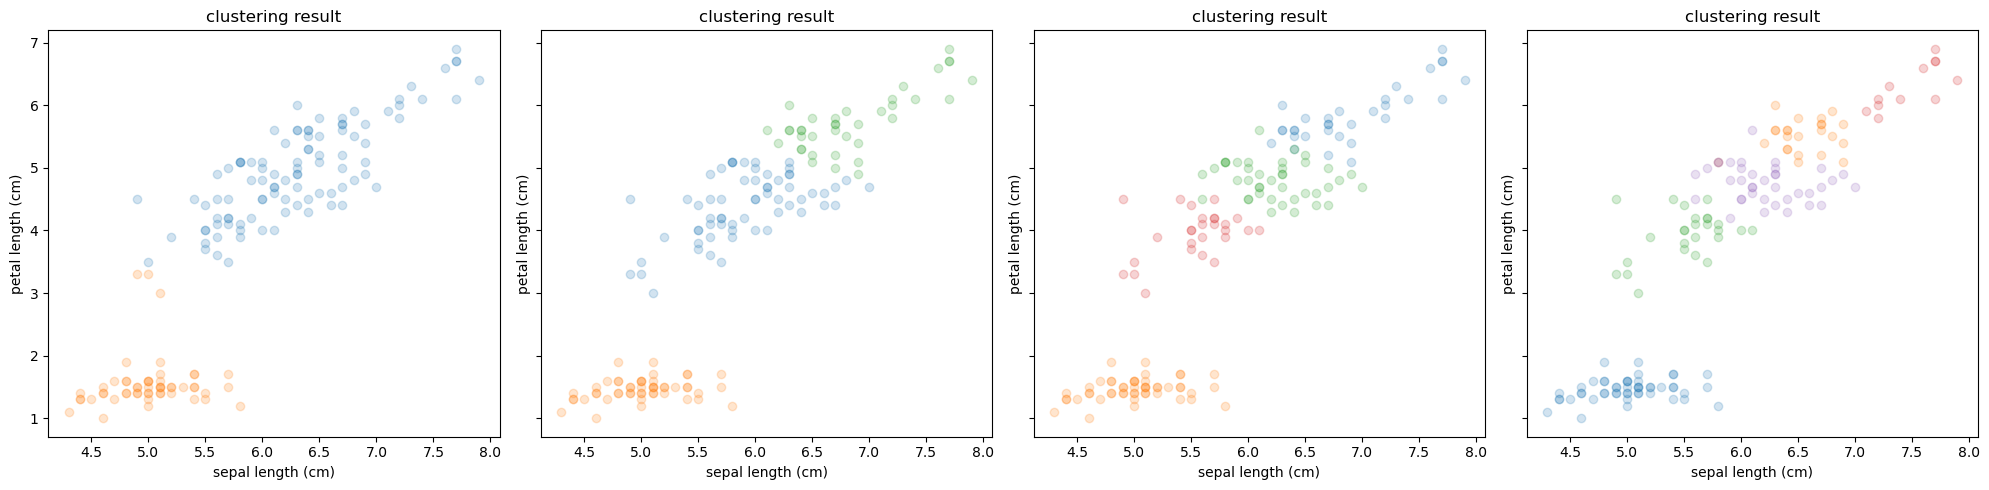

In [12]:
fig, ax = plt.subplots(1,K-2, figsize=(20, 5), sharex="all", sharey = "all", tight_layout=True)

iris_df = sns.load_dataset("iris")
display(iris_df.head())
df = iris_df.drop(["species"],axis=1)

colors=["red","green","blue"]

for n_clusters in range(2,K):
    km = KMeans(n_clusters=n_clusters)             #クラスター数, 繰り返し回数の最大値
    clusters_sklearn = km.fit_predict(df) #各データ点がどのクラスター所属するか予測 (クラスター中心が最も近いクラスターを選択)

    for i in set(clusters_sklearn):
        idx = clusters_sklearn==i
        ax[n_clusters-2].scatter(df.loc[idx,'sepal_length'],df.loc[idx,'petal_length'], alpha=0.2,)
  
for k in range(len(ax)):
    ax[k].set_xlabel('sepal length (cm)')
    ax[k].set_ylabel('petal length (cm)')
    ax[k].set_title("clustering result")    
fig.show()